# Linear regression
Two approaches:

- Direct "closed-form" equation involving either inverse of $A^T*A$ or Moore-Penrose pseudoinverse
- Iterative optimisation using Gradient Descent (GD) or its' variants: Stochastic GD, Batch GD and Mini Batch GD

Linear Regression model:
$$ \hat{y} = \theta_{0}+\theta_{1}x_{1} + \cdots + \theta_{n}x_{n}$$

Where:
- $\hat{y}$ is a predicted value
- $n$ is the number of features
- $x_{i}$ is the i-th feature value
- $\theta_{j}$ is the j-th model parameter (including the bias term $\theta_{0}$ and the feature weights $\theta_{1}, \cdots, \theta_{n}$)

In vectorised form:
$$\hat{y}=h_{\theta}(x)=\theta \cdot x$$

It's worth remembering that $x_{0}$ is equal to 1 - bias unit

Often vectors are represented as column vectors, so if $\theta$ and $x$ are column vectors then the prediction $\hat{y}=\theta^{T}x$

MSE cost function for linear model:

$MSE(X,h_{\theta})=\frac{1}{m}\sum_{i=1}^{m} (\theta^{T}x^{(i)}-y^{(i)})^2$

## The normal equation

$$\hat{\theta} = (X^{T}X)^{-1}X^{T}y$$

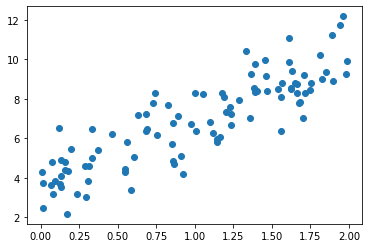

In [4]:
import numpy as np

X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(X, y)

In [6]:
# Add bias vector for each data point

X_b = np.c_[np.ones((100,1)), X]
X_b

array([[1.        , 0.68360917],
       [1.        , 1.46193525],
       [1.        , 0.01394589],
       [1.        , 1.56202348],
       [1.        , 0.58222836],
       [1.        , 1.40106264],
       [1.        , 1.82347637],
       [1.        , 0.0707984 ],
       [1.        , 1.88950471],
       [1.        , 1.55743816],
       [1.        , 0.13403007],
       [1.        , 1.71817475],
       [1.        , 1.67543869],
       [1.        , 0.32925992],
       [1.        , 1.81115712],
       [1.        , 1.94061659],
       [1.        , 0.74358218],
       [1.        , 1.62352951],
       [1.        , 0.85013593],
       [1.        , 1.16032732],
       [1.        , 0.75456628],
       [1.        , 1.65270258],
       [1.        , 0.30919923],
       [1.        , 1.39179242],
       [1.        , 0.19809255],
       [1.        , 1.35839127],
       [1.        , 0.97550158],
       [1.        , 1.18649281],
       [1.        , 0.31425358],
       [1.        , 1.23397284],
       [1.

In [7]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [8]:
theta_best

array([[3.67688631],
       [3.19689476]])

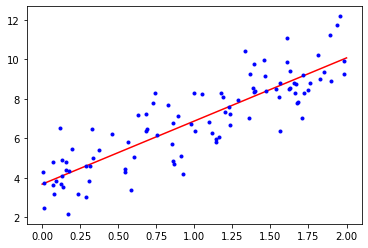

In [12]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
plt.plot(X_new, y_predict, "r-")
plt.plot(X,y, "b.")

## Moore-Penrose pseudoinverse

Normal equation computers the inverse of $(n+1) \cdot (n+1)$ sized matrix, and inverting the matrix takes between $O(n^{2,4})$ and $O(n^3)$, so if you double the number of features the computation time grows by roughly 5.3 to 8 times. Also $A^{T}A$ might not be invertible (eg. m<n or it is singular). There is another method which is called Moore-Penrose pseudoinverse and involves decomposition into SVD:
$$X=U\Sigma V^{T}$$ and then taking the reciporial of $\Sigma$, so the pseudoinverse is:
$$X^{+}=V\Sigma^{+}U^{T}$$


In [52]:
n = 100
U, s, VT = np.linalg.svd(X_b)
Sigma = np.concatenate((np.diag(1/s),np.zeros((n-s.size,s.size))),axis=0)
X_hat = U.dot(Sigma.dot(VT))
X_hat.T.dot(y)

array([[3.67688631],
       [3.19689476]])

Basically same result as closed form equation.

# Batch gradient descent
Partial derivatives of cost function:

$$\frac{\delta}{\delta\theta_{j}}MSE(\theta)=\frac{2}{m}\sum_{i=1}^{m}(\theta^{T}x^{(i)}-y^{(i)})x_{j}^{(i)}$$

Gradient vector of the cost function:
$$\nabla_{\theta}MSE(\theta)=\begin{pmatrix}
\frac{\delta}{\delta\theta_{0}}MSE(\theta) \\
\frac{\delta}{\delta\theta_{1}}MSE(\theta) \\
\cdots \\
\frac{\delta}{\delta\theta_{n}}MSE(\theta)
\end{pmatrix}=\frac{2}{m}X^{T}(X\theta - y)$$

Gradient Descent step:
$$\theta^{(i+1)}=\theta - \eta\nabla_{\theta}MSE(\theta)$$
where $\eta$ is the learning rate

In [55]:
eta = 0.1 #learning rate 
n_iterations = 1000
m = 100 #size of dataset

theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - eta * gradients
    
print(theta)

[[3.67688631]
 [3.19689476]]


And again similar result to previous methods using normal equation and Moore-Penrose pseudoinverse

## Stochastic Gradient Descent

Pick random element - decrease the learning rate to converge

In [56]:
n_epochs = 50
t0, t1 = 5, 50 #learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

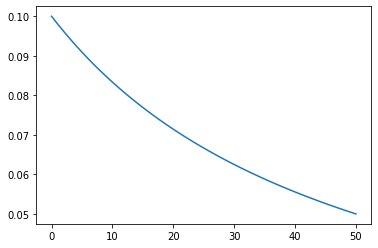

In [59]:
e = np.linspace(0,50)
t_e = learning_schedule(e)
plt.plot(e,t_e)

In [60]:
theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch*m + 1)
        theta = theta - eta * gradients
        
theta

array([[3.69910121],
       [3.1730297 ]])

And again we got a very similar result, but we went thorugh whole training set 50 times, not 10000.

# Mini-batch
A tradeoff between those two - not too chatoic, not too big dataset - simple to parallelise using GPU and matrix-vector operations

# Polynomial regression

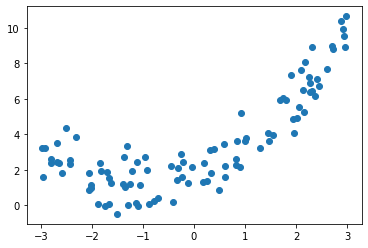

In [66]:
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
plt.scatter(X,y)

In [67]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-2.58036888])

In [68]:
X_poly[0]

array([-2.58036888,  6.65830357])

`PolynomialFeatures` adds additional powers of the features (like generating new features), and then we can fit it using standard linear regression

In [70]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)

LinearRegression()

In [72]:
lin_reg.intercept_, lin_reg.coef_

(array([1.7117108]), array([[1.10241303, 0.53354042]]))

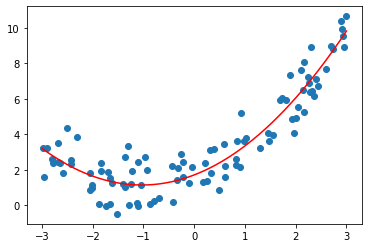

In [104]:
x_input_poly = np.linspace(-3,3).reshape(50,1)
x_test_poly = poly_features.fit_transform(x_input_poly)
y_test_poly_pred = lin_reg.predict(x_test_poly)
plt.scatter(X,y)
plt.plot(x_input_poly, y_test_poly_pred, "r-")


## Plotting learning curves in sklearn

To avoid overfitting or underfitting

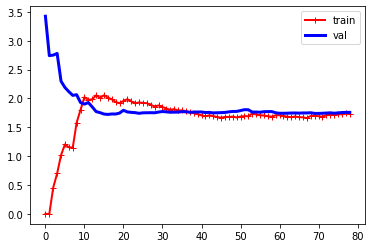

In [114]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
def plot_learning_curves(model, X, Y):
    X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2)
    train_errors, val_errors = [],[]
    for m in range(1,len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors),"r-+", linewidth=2,label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend()
    
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X,y)

Ok, so we have classic underfitting: 
- the validation error is high
- we have plateau both on validation and train
- the more examples we add, the train at beggining has more error
- adding more instances won't help, we need to change the model

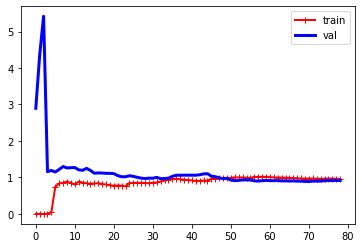

In [120]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3, include_bias=False)),
    ("lin_reg", LinearRegression()),
])

plot_learning_curves(polynomial_regression,X,y)

In the end the train score is higher than validation score, so the model is overfitting

## Ridge regression

Ridge regression is a regularized version of Linear Regression: a regularization term equal to $\alpha\sum_{i=1}^{n}\theta_{i}^{2}$

It is worth noticing that there is no penalty for bias unit. 
If $\alpha$ is 0 then it is normal linear regression
If $\alpha$ is very large then it's the horizontal line at height equal to the mean.

So, the new cost function is:
$$J(\theta)=MSE(\theta)+\alpha\sum_{i=1}^{n}\theta_{i}^{2}$$

If we take all weights but bias unit weight as the vector $w$, then the ridge regression penalty can be written as $\frac{1}{2}(\Vert{w}\Vert_{2})^{2}$

It can be written also as a closed-form solution:
$$\hat{\theta}=(X^{T}X+\alpha A)^{-1}X^{T}y$$